In [1]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Loading the data
df_train=pd.read_csv("D:DS_TriS/SVM/train.csv")

In [3]:
df_train.shape

(42000, 785)

In [4]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [5]:
# Function used for deskewing the image which internally first calls the moment function described above
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

In [6]:
# Function for scaling the data between 0 and 1
def scale(vect):
    return (vect-vect.min())/(vect.max()-vect.min())

In [7]:
# Getting the features from the train data frame by dropping label from the data frame
df_X=df_train.drop("label",axis=1)
# Scaling the data
X=df_X.apply(scale)
# Dropping all the columns with only NaN values
X=X.dropna(axis=1,how='all')
# Saving the label data as the target variable
y=df_train["label"]

In [8]:
X.head()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Splitting the data into test and training set for our first simple linear SVM testing
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [10]:
# Creating our linear SVM object
from sklearn.svm import SVC
clf=SVC(C=1,kernel="linear")

In [ ]:
clf.fit(train_x,train_y)

In [107]:
y_predict=clf.predict(test_x)

In [108]:
# Measuring the accuracy of our predictions
from sklearn import metrics
accuracy=metrics.accuracy_score(test_y,y_predict)
print(accuracy)

0.9274603174603174


In [109]:
# A function where we going to test different level of PCA decomposition and see how it improves accuracy
from sklearn.decomposition import PCA
def n_component_analysis(n,X_train, y_train, X_val, y_val,kernel_type="linear"):
   
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {}".format(n))
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)

    print('SVC begin')
    clf1 = SVC(kernel=kernel_type)
    clf1.fit(X_train_pca, y_train)
    predictions=clf1.predict(X_val_pca)
    accuracy = metrics.accuracy_score(y_val,predictions)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [110]:
# Calling the PCA function above where kernel is linear by default and see if we ca improve our accuracy
n_s = np.linspace(0.70, 0.85, num=15)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n,train_x, train_y, test_x, test_y)
    accuracy.append(tmp)

PCA begin with n_components: 0.7
SVC begin
accuracy: 0.9118253968253969
PCA begin with n_components: 0.7107142857142856
SVC begin
accuracy: 0.9143650793650794
PCA begin with n_components: 0.7214285714285714
SVC begin
accuracy: 0.9141269841269841
PCA begin with n_components: 0.7321428571428571
SVC begin
accuracy: 0.9153174603174603
PCA begin with n_components: 0.7428571428571428
SVC begin
accuracy: 0.9169047619047619
PCA begin with n_components: 0.7535714285714286
SVC begin
accuracy: 0.9191269841269841
PCA begin with n_components: 0.7642857142857142
SVC begin
accuracy: 0.9225396825396825
PCA begin with n_components: 0.7749999999999999
SVC begin
accuracy: 0.9223809523809524
PCA begin with n_components: 0.7857142857142857
SVC begin
accuracy: 0.9238095238095239
PCA begin with n_components: 0.7964285714285714
SVC begin
accuracy: 0.9271428571428572
PCA begin with n_components: 0.8071428571428572
SVC begin
accuracy: 0.9280952380952381
PCA begin with n_components: 0.8178571428571428
SVC begin


In [111]:
del accuracy
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n,train_x, train_y, test_x, test_y,"rbf")
    accuracy.append(tmp)

PCA begin with n_components: 0.7
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9757142857142858
PCA begin with n_components: 0.7107142857142856
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9765079365079365
PCA begin with n_components: 0.7214285714285714
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.976984126984127
PCA begin with n_components: 0.7321428571428571
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9773809523809524
PCA begin with n_components: 0.7428571428571428
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9776984126984127
PCA begin with n_components: 0.7535714285714286
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9775396825396825
PCA begin with n_components: 0.7642857142857142
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9775396825396825
PCA begin with n_components: 0.7749999999999999
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9773809523809524
PCA begin with n_components: 0.7857142857142857
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9771428571428571
PCA begin with n_components: 0.7964285714285714
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9772222222222222
PCA begin with n_components: 0.8071428571428572
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9770634920634921
PCA begin with n_components: 0.8178571428571428
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9767460317460317
PCA begin with n_components: 0.8285714285714285
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9764285714285714
PCA begin with n_components: 0.8392857142857143
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9764285714285714
PCA begin with n_components: 0.85
SVC begin


C:\Users\Triple S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9757936507936508


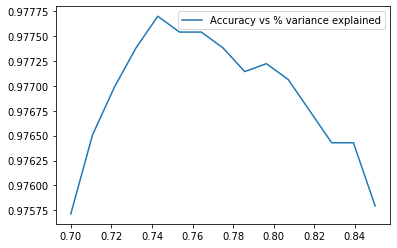

In [115]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_s,np.array(accuracy),label='Accuracy vs % variance explained')
plt.legend()
plt.show()

In [116]:
# Do the PCA transform with n=0.83 and after that fitting a 'rbf' kernel with C=20 and gamma=0.001
pca = PCA(n_components=0.83)
pca.fit(train_x)
X_train_pca = pca.transform(train_x)
X_val_pca = pca.transform(test_x)

clf1 = SVC(kernel="rbf",C=20,gamma=0.01)
clf1.fit(X_train_pca,train_y)
predictions=clf1.predict(X_val_pca)
metrics.accuracy_score(test_y,predictions)

0.9801587301587301

In [128]:
import cv2

In [168]:
image = cv2.resize(image,(52,1))

In [169]:
dff = pd.DataFrame(image,index=image[:,0])

In [170]:
dff

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
238,238,243,252,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,252,243,238


In [157]:
hk=cv2.imread("D:\\DS_TriS\\6.png",0)
image = cv2.resize(hk, (28, 28))
print(image)


AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [154]:
df_test = pd.read_csv("D:DS_TriS/test.csv")
cv2.imshow("output window",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
# Scaling the data
df_test=(df_test-df_X.min())/(df_X.max()-df_X.min())
# Only looking at the features that were present in our training set as well
X_t=df_test[X.columns]
# Doing the PCA transform
X_trans=pca.transform(X_t)

In [119]:
final=clf1.predict(X_trans)
df=pd.DataFrame(final,columns=['Label'],index=np.arange(1,28001))

In [120]:
# Saving the dataframe into a result.csv file
df.to_csv('subimission1.csv',index_label='ImageId')

In [167]:
X_trans.shape

(28000, 52)

In [171]:
clf1.predict(dff)

array([1], dtype=int64)

In [172]:
#Do RESHAPING_Remaining refer TowardsDataScience....